In [114]:
import json
data = 'wnli'

with open(f'./{data}_results_revised.json', 'r') as f:
    res = json.load(f)


In [115]:
import numpy as np
## performance check
perf = [[[],[]] for _ in range(6)]
mean_acc = []
std_acc = []
mean_f1 = []
std_f1 = []
for r in res:
    perf[r["number of filler tokens"]][0].append(r['accuracy'])
    perf[r["number of filler tokens"]][1].append(r['macro_f1_score'])
for i, p in enumerate(perf):
    print(f"accuracy mean and std of {i} filler tokens")
    print(f"mean : {np.mean(np.array(p[0]))}")
    mean_acc.append(np.mean(np.array(p[0])))
    print(f"std : {np.std(np.array(p[0]))}")
    std_acc.append(np.std(np.array(p[0])))
    print(f"f1 score mean and std of {i} filler tokens")
    print(f"mean : {np.mean(np.array(p[1]))}")
    mean_f1.append(np.mean(np.array(p[1])))
    print(f"std : {np.std(np.array(p[1]))}")
    std_f1.append(np.std(np.array(p[1])))
    print("_____________________")


accuracy mean and std of 0 filler tokens
mean : 0.552112
std : 0.07836919328409604
f1 score mean and std of 0 filler tokens
mean : 0.4723179999999999
std : 0.11679426122888058
_____________________
accuracy mean and std of 1 filler tokens
mean : 0.5605640000000001
std : 0.06630158628569909
f1 score mean and std of 1 filler tokens
mean : 0.452276
std : 0.08589233088000349
_____________________
accuracy mean and std of 2 filler tokens
mean : 0.538028
std : 0.08183733803099902
f1 score mean and std of 2 filler tokens
mean : 0.46594800000000003
std : 0.1250931482376233
_____________________
accuracy mean and std of 3 filler tokens
mean : 0.5408440000000001
std : 0.06521826511032014
f1 score mean and std of 3 filler tokens
mean : 0.44473
std : 0.09330007888528284
_____________________
accuracy mean and std of 4 filler tokens
mean : 0.5380280000000001
std : 0.06923028626258887
f1 score mean and std of 4 filler tokens
mean : 0.43976000000000004
std : 0.08791231608824786
_____________________


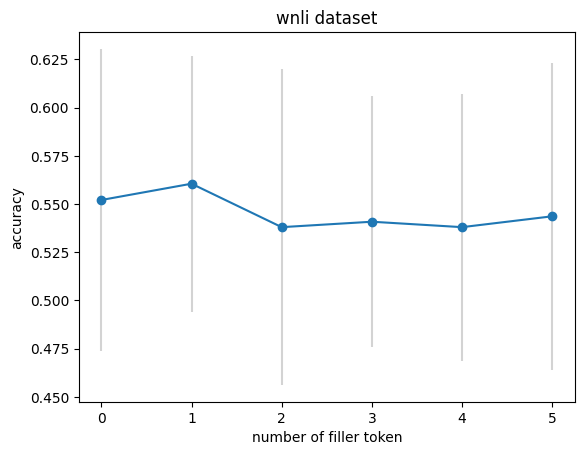

In [116]:
import matplotlib.pyplot as plt

plt.errorbar([0,1,2,3,4,5], mean_acc, std_acc,  fmt='-o', ecolor='lightgray', )
plt.title(f'{data} dataset')
plt.xlabel('number of filler token')
plt.ylabel('accuracy')
plt.show()

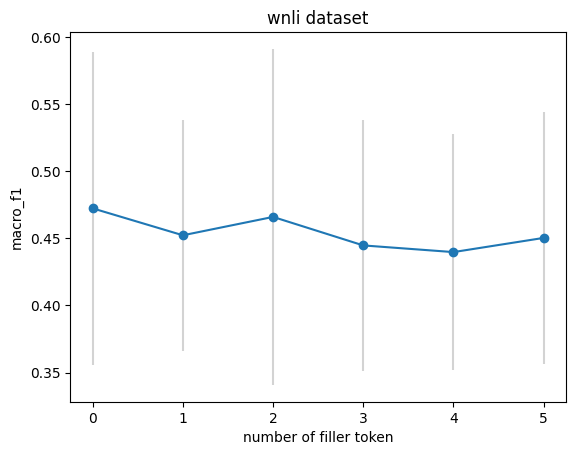

In [117]:
plt.errorbar([0,1,2,3,4,5], mean_f1, std_f1,  fmt='-o', ecolor='lightgray', )
plt.title(f'{data} dataset')
plt.xlabel('number of filler token')
plt.ylabel('macro_f1')
plt.show()

In [118]:
#analyzing W2R and R2W
seeds = [38,39,40,41,42]
w2r_total = [0,0,0,0,0]
r2w_total = [0,0,0,0,0]
for seed in seeds:
    seed_res = [r for r in res if r['seed']== seed]
    right_or_wrong = []
    for test_idx in seed_res[0]['results'].keys():
        right_or_wrong_each = []
        for r in seed_res:
            if r['results'][test_idx]['answer']==r['results'][test_idx]['prediction']:
                right_or_wrong_each.append('R')
            else:
                right_or_wrong_each.append('W')
        right_or_wrong.append(right_or_wrong_each)
    w2r_count = [0,0,0,0,0]
    r2w_count = [0,0,0,0,0]
    for l in right_or_wrong:
        for i in range(1,6):
            if l[i]==l[0]:
                continue
            else:
                if l[0]=='R' and l[i]=='W':
                    r2w_count[i-1]+=1
                else:
                    w2r_count[i-1]+=1
    w2r_total = [w2r_total[i]+c for i,c in enumerate(w2r_count)]
    r2w_total = [r2w_total[i]+c for i,c in enumerate(r2w_count)]
dev_dataset_size = len(seed_res[0]['results'].keys())
w2r_total = [w/(dev_dataset_size*5) for w in w2r_total]
r2w_total = [w/(dev_dataset_size*5) for w in r2w_total]
print("The ratio of wrong prediction changing to right prediction is ", w2r_total)
print("The ratio of right prediction changing to wrong prediction is ", r2w_total)
    

The ratio of wrong prediction changing to right prediction is  [0.10704225352112676, 0.02535211267605634, 0.036619718309859155, 0.05070422535211268, 0.03943661971830986]
The ratio of right prediction changing to wrong prediction is  [0.09859154929577464, 0.03943661971830986, 0.04788732394366197, 0.0647887323943662, 0.04788732394366197]


In [119]:
## re-measure performance based on generated setting
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("meta-llama/Llama-2-7b-hf")
re_acc_total = []
for seed in seeds:
    seed_res = [r for r in res if r['seed']== seed]
    re_acc = []
    for r in seed_res:
        cnt = 0
        for test_idx in seed_res[0]['results'].keys():
            top1_token = list(r['results'][test_idx]['top10_token'].keys())[0]
            if tokenizer.decode(tokenizer.encode("..."+r['results'][test_idx]['answer'],add_special_tokens=False)[1],skip_special_tokens=True)==top1_token:
                cnt+=1
        acc= cnt/len(seed_res[0]['results'].keys())
        re_acc.append(acc)
    re_acc_total.append(re_acc)

In [120]:
mean_re_acc = []
std_re_acc = []
re_acc_total_trans = np.transpose(np.array(re_acc_total))
for i, p in enumerate(re_acc_total_trans):
    print(f"remeasured accuracy mean and std of {i} filler tokens")
    print(f"mean : {np.mean(p)}")
    mean_re_acc.append(np.mean(p))
    print(f"std : {np.std(p)}")
    std_re_acc.append(np.std(p))
    print("_____________________")

remeasured accuracy mean and std of 0 filler tokens
mean : 0.552112676056338
std : 0.07836860700418904
_____________________
remeasured accuracy mean and std of 1 filler tokens
mean : 0.5605633802816902
std : 0.06630198476585814
_____________________
remeasured accuracy mean and std of 2 filler tokens
mean : 0.5380281690140845
std : 0.08183571293709269
_____________________
remeasured accuracy mean and std of 3 filler tokens
mean : 0.5408450704225352
std : 0.06521598255093085
_____________________
remeasured accuracy mean and std of 4 filler tokens
mean : 0.5380281690140845
std : 0.06922932804194089
_____________________
remeasured accuracy mean and std of 5 filler tokens
mean : 0.5436619718309859
std : 0.0794745688995261
_____________________


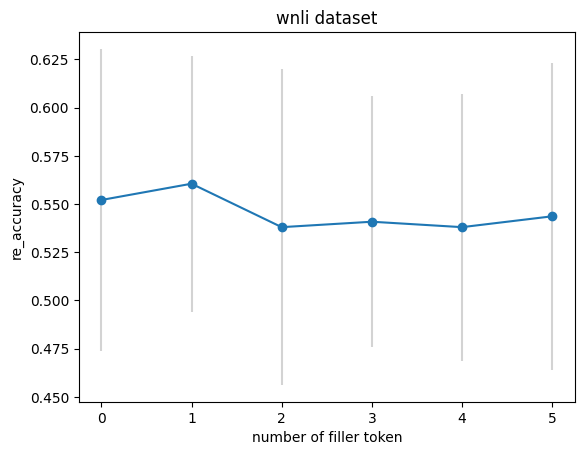

In [121]:
plt.errorbar([0,1,2,3,4,5], mean_re_acc, std_re_acc,  fmt='-o', ecolor='lightgray', )
plt.title(f'{data} dataset')
plt.xlabel('number of filler token')
plt.ylabel('re_accuracy')
plt.show()

In [122]:
## interesting phenomena of next token prediction : reason why re-measured 
for seed in seeds:
    seed_res = [r for r in res if r['seed']== seed]
    example_idx = list(seed_res[0]['results'].keys())[0]
    print("answer is ", seed_res[0]['results'][example_idx]['answer'])
    print("\n")
    for i in range(0,6):
        print(f"{i} filler tokens")
        print(seed_res[i]['results'][example_idx]['prob_distribution'])
        print("sum", sum(list(seed_res[i]['results'][example_idx]['prob_distribution'].values())))
        # print(seed_res[i]['results'][example_idx]['top10_token'])
        print("_________________________")
    break

answer is  no


0 filler tokens
{'no': 0.4026, 'yes': 0.5703}
sum 0.9729000000000001
_________________________
1 filler tokens
{'no': 0.4782, 'yes': 0.4931}
sum 0.9713
_________________________
2 filler tokens
{'no': 0.4137, 'yes': 0.5611}
sum 0.9748000000000001
_________________________
3 filler tokens
{'no': 0.409, 'yes': 0.5694}
sum 0.9783999999999999
_________________________
4 filler tokens
{'no': 0.407, 'yes': 0.5506}
sum 0.9576
_________________________
5 filler tokens
{'no': 0.3965, 'yes': 0.5825}
sum 0.9790000000000001
_________________________


In [123]:
prob_sum_total_seed = []
for seed in seeds:
    seed_res = [r for r in res if r['seed']== seed]
    prob_sum_total = []
    for test_idx in seed_res[0]['results'].keys():
        prob_sum = []
        for r in seed_res:
            prob_sum.append(round(sum(list(r['results'][test_idx]['prob_distribution'].values())),4))
        prob_sum_total.append(prob_sum)
    prob_sum_total = np.mean(np.transpose(np.array(prob_sum_total)), axis=-1)
    prob_sum_total_seed.append(prob_sum_total)
prob_sum_total_seed = np.mean(np.transpose(np.array(prob_sum_total_seed)), axis=-1)
print(prob_sum_total_seed)


[0.97074789 0.96838901 0.97256817 0.97587155 0.94696366 0.97629859]


In [125]:
from scipy.stats import pearsonr

print(pearsonr(mean_acc, prob_sum_total_seed))

PearsonRResult(statistic=0.19216282007806385, pvalue=0.7153037248190878)
